In [1]:
!python --version

Python 3.4.2


In [2]:
import sys
print(sys.version)

3.4.2 (default, Mar 11 2017, 20:07:25) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]


In [3]:
import sys
sys.path

['',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python34.zip',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/plat-darwin',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/lib-dynload',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages',
 '/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/IPython/extensions',
 '/Users/pedrohserrano/.ipython']

In [4]:
import os
os.getcwd()

'/Users/pedrohserrano/data-visualization/location-history'

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd

In [7]:
import mpl_toolkits

In [8]:
from mpl_toolkits.basemap import Basemap

In [9]:
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

In [10]:
import fiona
from descartes import PolygonPatch

In [11]:
from matplotlib.collections import PatchCollection

In [12]:
import json
import datetime

In [16]:
with open('/Users/pedrohserrano/google-takeout/Ubicaciones/Historialdeubicaciones.json', 'r') as fh:
    raw = json.loads(fh.read())

In [ ]:
ld = pd.DataFrame(raw['locations'])
del raw #free up some memory
# convert to typical units
ld['latitudeE7'] = ld['latitudeE7']/float(1e7) 
ld['longitudeE7'] = ld['longitudeE7']/float(1e7)
ld['timestampMs'] = ld['timestampMs'].map(lambda x: float(x)/1000) #to seconds
ld['datetime'] = ld.timestampMs.map(datetime.datetime.fromtimestamp)
# Rename fields based on the conversions we just did
ld.rename(columns={'latitudeE7':'latitude', 'longitudeE7':'longitude', 'timestampMs':'timestamp'}, inplace=True)
ld = ld[ld.accuracy < 1000] #Ignore locations with accuracy estimates over 1000m
ld.reset_index(drop=True, inplace=True)

In [23]:
!pwd

/Users/pedrohserrano/data-visualization/location-history


In [24]:
!ls -la

total 300288
drwxr-xr-x  26 pedrohserrano  staff       884 Mar 15 21:45 .
drwxr-xr-x  15 pedrohserrano  staff       510 Mar 11 02:12 ..
-rw-r--r--@  1 pedrohserrano  staff      6148 Mar 15 21:39 .DS_Store
-rw-r--r--   1 pedrohserrano  staff        12 Mar 11 02:07 .gitignore
drwxr-xr-x   3 pedrohserrano  staff       102 Mar 15 21:29 .ipynb_checkpoints
drwxr-xr-x@  9 pedrohserrano  staff       306 Jul 10  2013 Colonias
-rw-r--r--@  1 pedrohserrano  staff  24762955 Mar 11 22:50 Colonias.zip
-rwxr-xr-x@  1 pedrohserrano  staff  19843556 Feb 18 17:21 Historialdeubicaciones.json
-rw-r--r--   1 pedrohserrano  staff    399183 Mar 15 21:45 Location-test.ipynb
-rw-r--r--   1 pedrohserrano  staff     48331 Mar 11 20:55 Location.ipynb
drwx------@ 21 pedrohserrano  staff       714 Mar 15 21:39 MEX_adm_shp
-rw-r--r--@  1 pedrohserrano  staff   9524435 Mar 15 21:39 MEX_adm_shp.zip
drwxr-xr-x@  8 pedrohserrano  staff       272 Jul 10  2013 Municipios
-rwxr-xr-x@  1 pedrohserrano  staff  52584380 Jul 1

In [27]:
shapefilename = '/Users/pedrohserrano/data-visualization/location-history/MEX_adm_shp/MEX_adm2'

In [122]:
shp = fiona.open(shapefilename+'.shp')

In [123]:
shp

<open Collection '/Users/pedrohserrano/data-visualization/location-history/MEX_adm_shp/MEX_adm2.shp:MEX_adm2', mode 'r' at 0x10c97af98>

In [124]:
coords = shp.bounds

In [125]:
coords

(-118.36888885498041,
 14.532917022705135,
 -86.71013641357423,
 32.71804046630862)

In [126]:
shp.close()

In [127]:
w, h = coords[2] - coords[0], coords[3] - coords[1]
extra = 0

In [128]:
print(w,h)

31.65875244140618 18.185123443603487


In [129]:
m = Basemap(
    projection='tmerc', ellps='WGS84',
    lon_0=np.mean([coords[0], coords[2]]),
    lat_0=np.mean([coords[1], coords[3]]),
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - (extra * h), 
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + (extra * h),
    resolution='i',  suppress_ticks=True)

/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


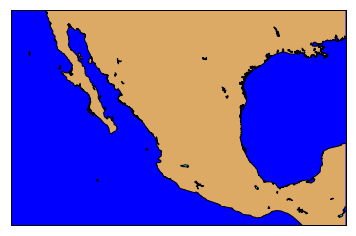

In [130]:
m.drawmapboundary(fill_color='blue')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()

In [131]:
type(m)

mpl_toolkits.basemap.Basemap

In [132]:
_out = m.readshapefile(shapefilename, name='MEX_adm2', drawbounds=False, color='none', zorder=2)

In [133]:
print (_out)

(1853, 5, [-118.36888885498041, 14.532917022705135, 0.0, 0.0], [-86.71013641357423, 32.71804046630862, 0.0, 0.0])


In [134]:
# define map colors
land_color = '#f5f5f3'
water_color = '#cdd2d4'
coastline_color = '#999999'
border_color = '#999999'
meridian_color = '#aaaaaa'
marker_fill_color = '#cc3300'
marker_edge_color = 'None'

/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/pedrohserrano/.pyenv/versions/3.4.2/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


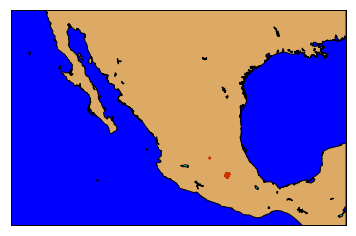

In [135]:
m.drawmapboundary(fill_color='blue')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()

# project our points from each dataset then concatenate and scatter plot them
x, y = m(ld['longitude'].values, ld['latitude'].values)
m.scatter(x, y, s=10, color=marker_fill_color, edgecolor=marker_edge_color, alpha=1, zorder=3)

# show the map
#plt.savefig('images/foursquare_checkins_map.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [57]:
# set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(hood_points) for hood_points in m.seattle],
    'name': [hood['S_HOOD'] for hood in m.seattle_info]
})
# Convert our latitude and longitude into Basemap cartesian map coordinates
mapped_points = [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(ld['longitude'], 
            ld['latitude'])]
all_points = MultiPoint(mapped_points)
# Use prep to optimize polygons for faster computation
hood_polygons = prep(MultiPolygon(list(df_map['poly'].values)))
# Filter out the points that do not fall within the map we're making
city_points = filter(hood_polygons.contains, all_points)

AttributeError: 'Basemap' object has no attribute 'seattle'